In [1]:
from FUNCTIONS import *
%matplotlib inline

import sklearn.discriminant_analysis
random.seed(42)

Total Events: 100000
Total Labels: 100000

Shape:  (100000, 1600)

Train:  (69700, 1600) (69700,)
Val:  (15300, 1600) (15300,)
Test:  (15000, 1600) (15000,)
 


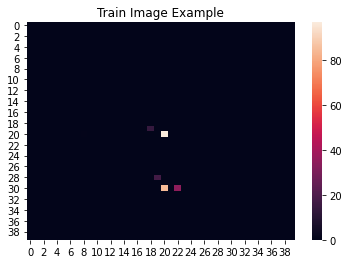

In [2]:
# MAIN
data_s = np.array(pd.read_csv('data_s_180k').iloc[:, 1:])
data_b = np.array(pd.read_csv('data_b_180k').iloc[:, 1:])

# Slice & Save
events_no = int(50000)
data_s = data_s[0:events_no*40, 0:40]
data_b = data_b[0:events_no*40, 0:40]

# # Save Datasets
# pd.DataFrame(data_s).to_csv('data_s_1000')
# pd.DataFrame(data_b).to_csv('data_b_1000')

train_examples, train_labels, val_examples, val_labels, test_examples, test_labels = preprocess_ML_sklearn(data_s, data_b)




In [3]:
naive_bayes = MultinomialNB()
random_forest = RandomForestClassifier(random_state=42, n_jobs=-1)
SVM = SVC(random_state=42)
KNN = sklearn.neighbors.KNeighborsClassifier(n_jobs=-1)
bagging = BaggingClassifier(random_state=42, n_jobs=-1)

In [4]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
import time


# Naive Bayes
alpha = [0, 0.001, 0.01, 0.1, 0.5, 1, 1.5, 2, 5, 10, 15, 20, 30, 40, 50, 80, 100, 150]

# Random Forest
criterion = ['gini', 'entropy']
n_estimators_rf = [10, 50, 100, 200]
max_depth_rf = [5, 20, 50, None]
min_samples_leaf_rf = [1, 2, 15, 40]
min_samples_split_rf = [2, 5, 10, 50]

# KNN
n_neighbors=[1, 3, 5, 12] 
weights_knn=['uniform', 'distance']
leaf_size_knn=[10, 30, 60]
p= [1, 2]


# Bagging
n_estimators_bagging = [10, 20, 50, 100, 200]
max_samples_bagging = [0.1, 0.2, 1.0, 2.0, 3.0]
max_features_bagging = [0.5, 1.0, 2.0, 50.0]


# SVM
c_parameter = [0.1, 1, 10]
gamma = [0.001, 0.01, 0.1, 1, 5]




# Hyperparameters
naive_bayes_parameters = {'alpha': alpha}
random_forest_parameters = {'criterion': criterion, 'n_estimators': n_estimators_rf, 'max_depth': max_depth_rf, 'min_samples_leaf': min_samples_leaf_rf, 'min_samples_split': min_samples_split_rf}
KNN_parameters = {'n_neighbors': n_neighbors, 'weights': weights_knn, 'leaf_size': leaf_size_knn, 'p': p}
bagging_parameters = {'n_estimators': n_estimators_bagging, 'max_samples': max_samples_bagging, 'max_features': max_features_bagging}
SVM_parameters = {'c_parameter': c_parameter, 'gamma': gamma}

# Scoring object using accuracy
scorer = make_scorer(accuracy_score)


clfs_param =[(bagging, bagging_parameters)]

In [5]:
# Create list to store models
models = []
unopt_accuracy = []
accuracies = []

# Perform grid search
for clf, parameter in clfs_param:
    print('\n{}\n'.format(clf.__class__.__name__))
    
    grid_obj = GridSearchCV(clf, parameter, scoring=scorer, n_jobs = -1)
    
    # Perform grid search
    start = time.time()
    grid_fit = grid_obj.fit(train_examples, train_labels)
    end = time.time()
    print('Time to tune: {}s'.format(round(end - start), 2))
    
    # Get best estimator
    best_clf = grid_fit.best_estimator_
    models.append(best_clf)
    
    # Make predictions using the unoptimized and model
    start = time.time()
    predictions = (clf.fit(train_examples, train_labels)).predict(val_examples)
    best_predictions = best_clf.predict(val_examples)
    
    predictions_train = (clf.fit(train_examples, train_labels)).predict(train_examples)
    best_predictions_train = best_clf.predict(train_examples)
    end = time.time()
    print('Time to fit-predict: {}s\n'.format(round(end - start), 2))
    
    # Check hyperparameters
    print('Unoptimised: {}\n'.format(clf.get_params(deep = True)))
    print('Optimised: {}\n'.format(best_clf.get_params(deep = True)))
    
    # Print Results
    print("\nUnoptimised-accuracy-training: {:.4f}".format(accuracy_score(train_labels, predictions_train)))
    print("Optimised-accuracy-training: {:.4f}".format(accuracy_score(train_labels, best_predictions_train)))
    
    print("\nUnoptimised-accuracy-validation: {:.4f}".format(accuracy_score(val_labels, predictions)))
    print("Optimised-accuracy-validation: {:.4f}".format(accuracy_score(val_labels, best_predictions)))
    
    print('\n\n=============================================================================================')
    
    unopt_accuracy.append(accuracy_score(val_labels, predictions))
    accuracies.append(accuracy_score(val_labels, best_predictions))
    
print('All unoptimised accuracy (validation): {}'.format(unopt_accuracy))
print('Best unoptimised accuracy (validation): {}\n'.format(max(unopt_accuracy)))
print('All optimised accuracy (validation): {}'.format(accuracies))
print('Best optimised accuracy (validation): {}'.format(max(accuracies)))


BaggingClassifier



exception calling callback for <Future at 0x7fdd2d03f4d0 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 359, in __call__
    self.parallel.dispatch_next()
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 792, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/conda/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 531, in apply_async
    future = self._workers.submit(SafeFunction(func))
  File "/opt/conda/lib/

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.

The exit codes of the workers are {SIGKILL(-9)}

In [ ]:
print(models)
cmx_sklearn(models, test_examples, test_labels, dim=4)